In [274]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [275]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis(EDA)

In [276]:
df.shape

(614, 13)

This Dataset has 614 rows and 13 columns

In [277]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Dataset contains int and object type data

In [278]:
#to get good overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


This gives the information about the dataset which includes indexing type, non null values and memory usage

In [279]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

There are many null values present in the Dataset

In [280]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [281]:
#checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('**********************************')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
**********************************
Male      489
Female    112
Name: Gender, dtype: int64
**********************************
Yes    398
No     213
Name: Married, dtype: int64
**********************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
**********************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
**********************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
**********************************
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
**********************************
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1

In [282]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The column Loan_ID is the unique ID given to the applicants, Is has no significance in the prediction so lets drop this column

In [283]:
df.drop("Loan_ID",axis=1,inplace=True)


# Visualizing null Values


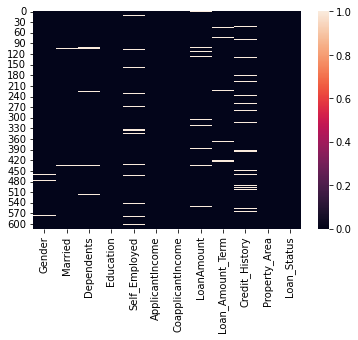

In [284]:
sns.heatmap(df.isnull())
plt.show()

The white lines in the heatmap represent the missing values in the dataset

In [285]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [286]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


# Treating Null values using Imputation Techniques

In [287]:
#Let us check the mode of the categorical columns below to fill with the null values

print("The mode of Gender is:", df["Gender"].mode())
print("The mode of Married is:", df["Married"].mode())
print("The mode of Dependents is:", df["Dependents"].mode())
print("The mode of Self_Employed is:", df["Self_Employed"].mode())
print("The mode of Education is:", df["Education"].mode())
print("The mode of Property_Area is:", df["Property_Area"].mode())

The mode of Gender is: 0    Male
dtype: object
The mode of Married is: 0    Yes
dtype: object
The mode of Dependents is: 0    0
dtype: object
The mode of Self_Employed is: 0    No
dtype: object
The mode of Education is: 0    Graduate
dtype: object
The mode of Property_Area is: 0    Semiurban
dtype: object


These are modes of the columns which contain null values. These are the values which are highly repeated in the columns.
The missing values will be replaced by their respective mode values.

In [288]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Education"]=df["Education"].fillna(df["Education"].mode()[0])
df["Property_Area"]=df["Property_Area"].fillna(df["Property_Area"].mode()[0])

In [289]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [290]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [291]:
#let us check the median values of numeric columns
print("The Median of ApplicantIncome is:", df["ApplicantIncome"].median())
print("The Median of CoapplicantIncome is:", df["CoapplicantIncome"].median())
print("The Median of LoanAmount is:", df["LoanAmount"].median())
print("The Median of Loan_Amount_Term is:", df["Loan_Amount_Term"].median())
print("The Median of Credit_History is:", df["Credit_History"].median())

The Median of ApplicantIncome is: 3812.5
The Median of CoapplicantIncome is: 1188.5
The Median of LoanAmount is: 128.0
The Median of Loan_Amount_Term is: 360.0
The Median of Credit_History is: 1.0


In [292]:
df["ApplicantIncome"]=df["ApplicantIncome"].fillna(df["ApplicantIncome"].median())
df["CoapplicantIncome"]=df["CoapplicantIncome"].fillna(df["CoapplicantIncome"].median())
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].median())

<AxesSubplot:>

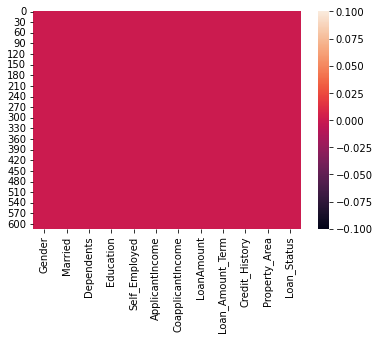

In [293]:
sns.heatmap(df.isnull())

In [294]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

These are the columns present in the Dataset after dropping Loan_id

In [295]:
#Cheking the uniqeness of Loan_status
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

There are only two values(yes or no) present in the target column

In [296]:
#Checking the counts in target value
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [297]:
#checking if there is any spaces in target column
df.loc[df["Loan_Status"]==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


There are no spaced in the target column

# Description of DataSet

In [298]:
#statistical summary of dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# This gives the statistical info of Dataset.

The mean is morethan median in all the columns except Loan_Amount_Term, it means that they are skewed to right

There is huge difference in max and 75% percentile which means there are outliers present in dataset

# Data Visualization: Univariate Analysis:

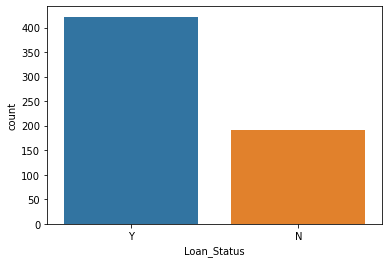

In [299]:
#count plot for Income
sns.countplot(df['Loan_Status'])
plt.show()

From the above graph we can conclude that more number of loan is approved and less has got denied

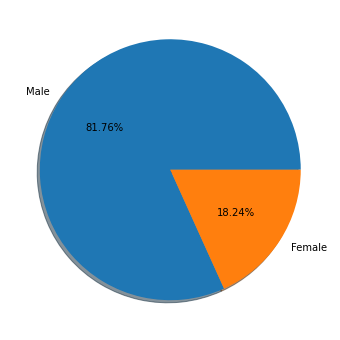

In [300]:
#Visualizing the count of Gender

df["Gender"].value_counts()
labels= 'Male', 'Female'
fig, ax =plt.subplots(figsize=(8,6))
ax.pie(df["Gender"].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

There are more number of Male Applicant (81.76%) for loan than Female (18.24%) Applicants. 

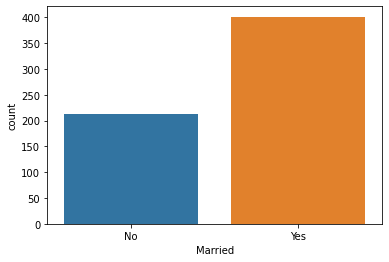

In [301]:
#count plot for MArried

sns.countplot(df['Married'])
plt.show()

The number of Married applicant who applied fo loan is higherthan the unmarried applicants

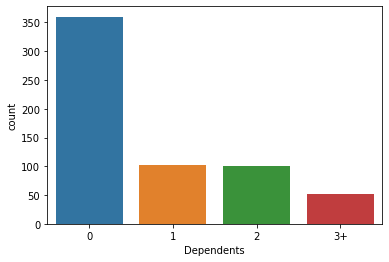

In [302]:
#count plot for Dependents

sns.countplot(df['Dependents'])
plt.show()

The applicant who have 0 dependent have  high counts and the applicant having morethan 3 dependent count are very less

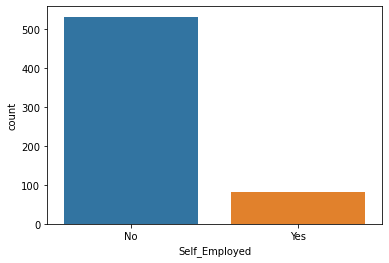

In [303]:
#count plot for Self_Employed

sns.countplot(df['Self_Employed'])
plt.show()

Most of the loan applicant are not self employed

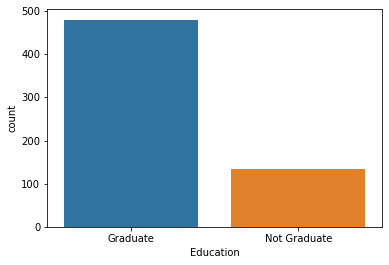

In [304]:
#count plot for Education

sns.countplot(df['Education'])
plt.show()

More number of people applied for loan are Graduates followed by not Graduates

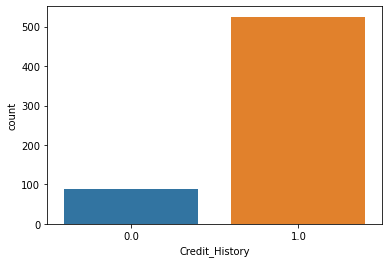

In [305]:
#count plot for Education

sns.countplot(df['Credit_History'])
plt.show()

Most of the applicant who have credit history 1 are high in numbers

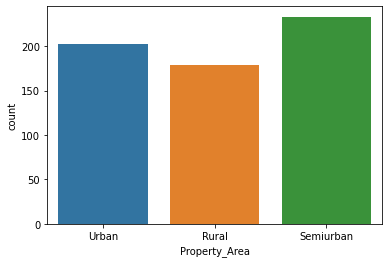

In [306]:
#count plot for Property_Area

sns.countplot(df['Property_Area'])
plt.show()

Applicant having property in Semiurban area has more chance of getting loan approved

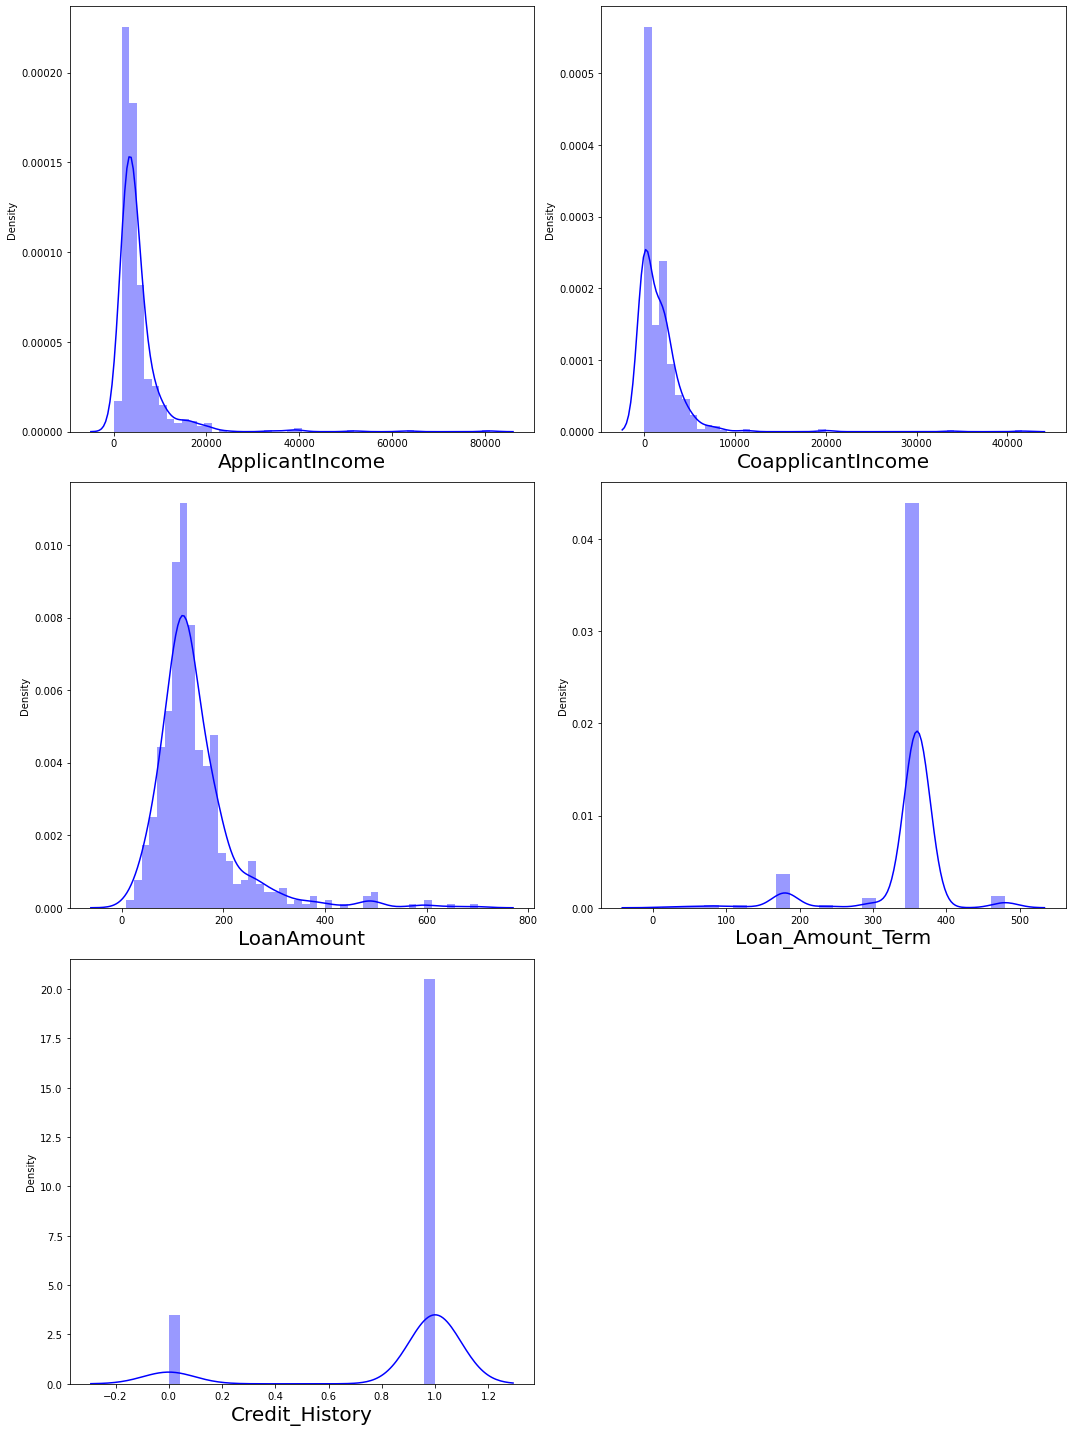

In [307]:
#Checking how data has beed distributed in each numeric column

plt.figure(figsize=(15,20), facecolor= 'white')
plotnumber=1

for column in numerical_col:
    if plotnumber <=9:
        ax= plt.subplot(3,2, plotnumber)
        sns.distplot(df[column], color='blue')
        plt.xlabel(column, fontsize=20)
        
        
    plotnumber +=1
plt.tight_layout()

All the numeric columns are skewed

# Bivariate Analysis 

<AxesSubplot:title={'center':'comparision between Dependents and Loan_Status'}, xlabel='Dependents', ylabel='count'>

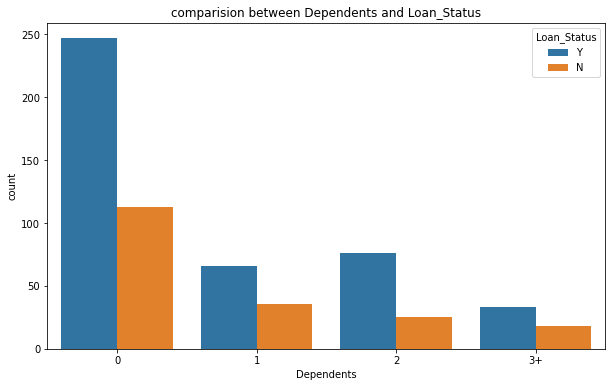

In [308]:
plt.figure(figsize=[10,6])
plt.title('comparision between Dependents and Loan_Status')
sns.countplot(df['Dependents'], hue=df['Loan_Status'])

The count of 0 dependent is high followed by more number of dependents

<AxesSubplot:title={'center':'comparision between Education and Loan_Status'}, xlabel='Education', ylabel='count'>

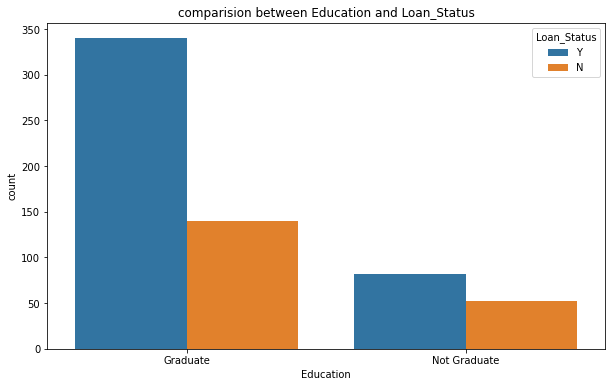

In [309]:
plt.figure(figsize=[10,6])
plt.title('comparision between Education and Loan_Status')
sns.countplot(df['Education'], hue=df['Loan_Status'])

The applicant who are graduate have tendency of getting loan than who are not

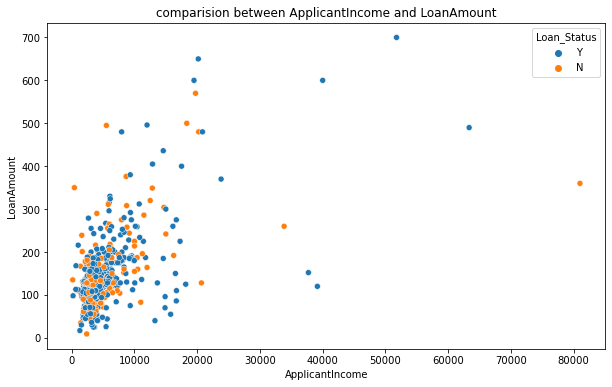

In [310]:
plt.figure(figsize=[10,6])
plt.title('comparision between ApplicantIncome and LoanAmount')
sns.scatterplot(df['ApplicantIncome'], df['LoanAmount'], hue=df['Loan_Status']);

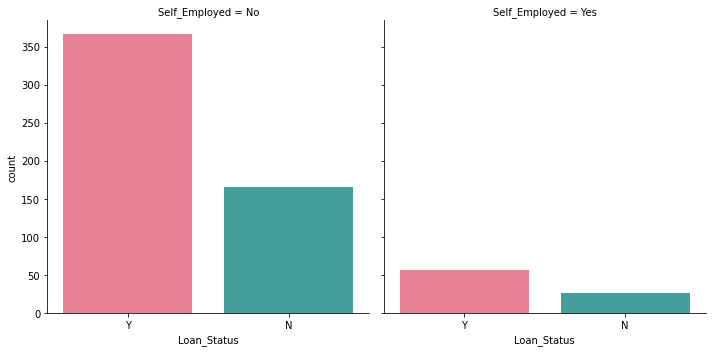

In [311]:
#comparision between features using cat plot

sns.catplot(x='Loan_Status', col='Self_Employed', data=df, kind='count', palette="husl")

Applicants who are not self employed has more chances  of getting loan approved

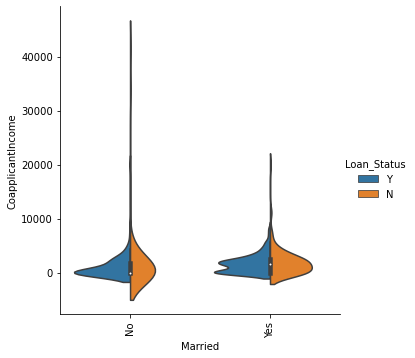

In [312]:
#lets plot catplot for pair of features
sns.catplot(x="Married", y="CoapplicantIncome", hue="Loan_Status", kind="violin", data=df, split=True)
plt.xticks(rotation=90);

Married people has more chances of getting loan approved

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


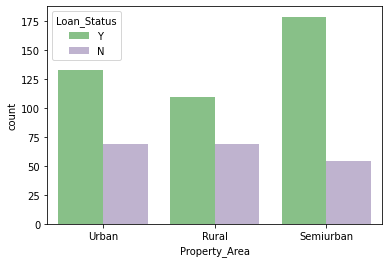

In [313]:
#visualizing the property area of the applicants

print(df["Property_Area"].value_counts())
sns.countplot(df["Property_Area"], hue=df["Loan_Status"], palette="Accent")
plt.show()

Most of the people from semiurban area are applying for loan followed by other areas

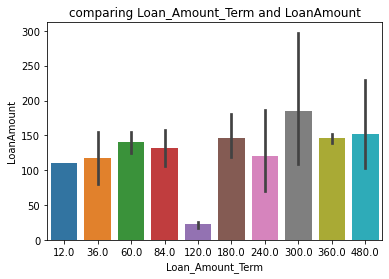

In [314]:
#compairing Loan_Amount_Term and LoanAmount

sns.barplot(x="Loan_Amount_Term", y="LoanAmount", data=df)
plt.title("comparing Loan_Amount_Term and LoanAmount")
plt.show()

The loan amount term 300 is high with loan amout compare to other

# Multivariate Analysis

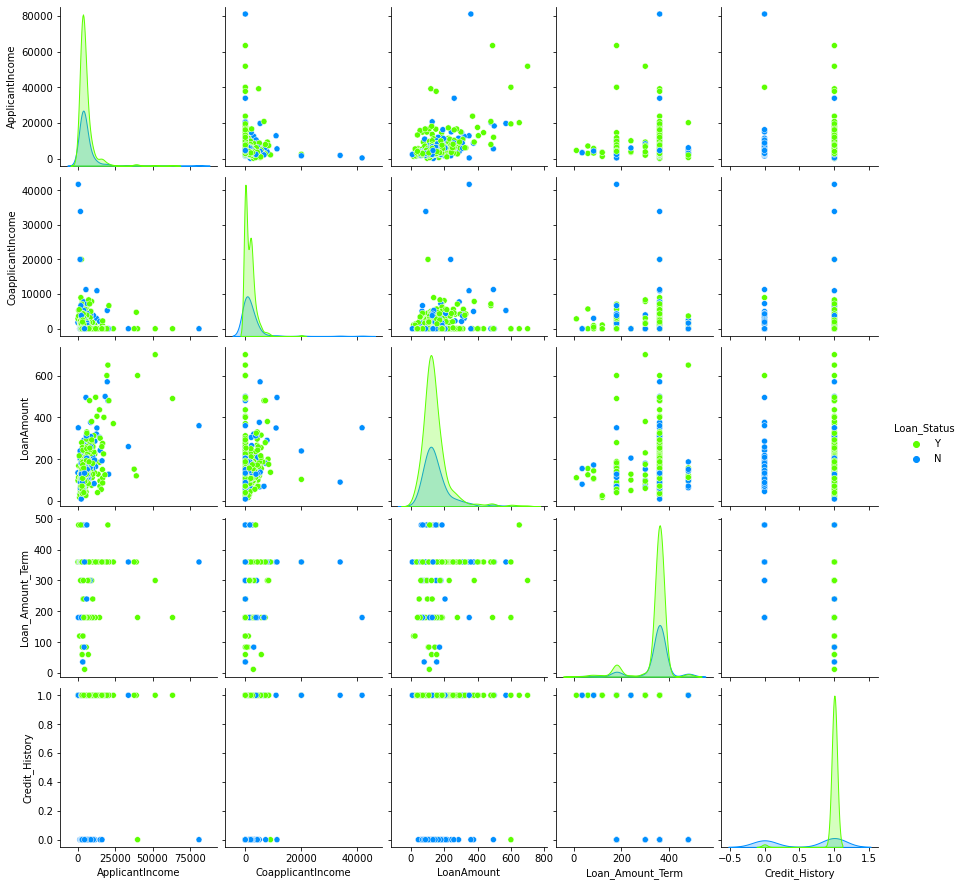

In [315]:
sns.pairplot(df, hue="Loan_Status", palette="gist_rainbow")

Above is the pairplot for having Loan_Status as target. There are some extreme outliers present in the dataset

# Identifying the Outliers

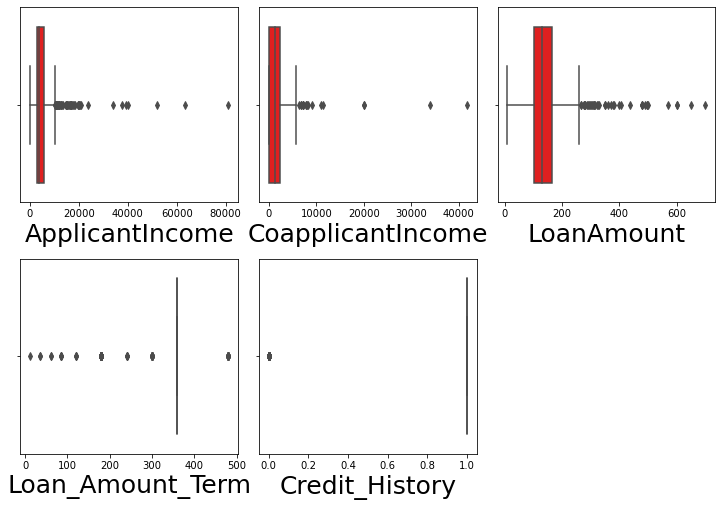

In [316]:
plt.figure(figsize=(10,10), facecolor= 'white')
plotnumber=1

for column in numerical_col:
    if plotnumber <=9:
        ax= plt.subplot(3,3, plotnumber)
        sns.boxplot(df[column], color='r')
        plt.xlabel(column, fontsize=25)
        
        
    plotnumber +=1
plt.tight_layout()

since credit history and loan amount term are categorical column no need to remove the outliers. In all other we can remove the outliers

In [318]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [319]:
features=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History']]

In [320]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This is the dataframe after removing the outliers.

In [321]:
df.shape

(614, 12)

In [322]:
df_new.shape

(577, 12)

In [323]:
data_loss=(614-577)/614*100
data_loss

6.026058631921824

using Zscore i have data loss of 6% which is less than 10

# Cheking the Skewness

In [324]:
df_new.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

The skewness is present in all the columns

In [325]:
#checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)  

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [345]:
skew= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [346]:
df_new[skew]=scaler.fit_transform(df_new[skew].values)
df_new[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.693376,-1.114172,0.013122,0.142297
1,0.258101,0.694668,0.013122,0.142297
2,-0.511665,-1.114172,-1.452223,0.142297
3,-0.786776,0.891216,-0.141640,0.142297
4,0.738669,-1.114172,0.249719,0.142297


In [347]:
#checking skewness after using the yeo johnson method
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.246179
CoapplicantIncome   -0.150023
LoanAmount          -0.046722
Loan_Amount_Term     0.393054
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

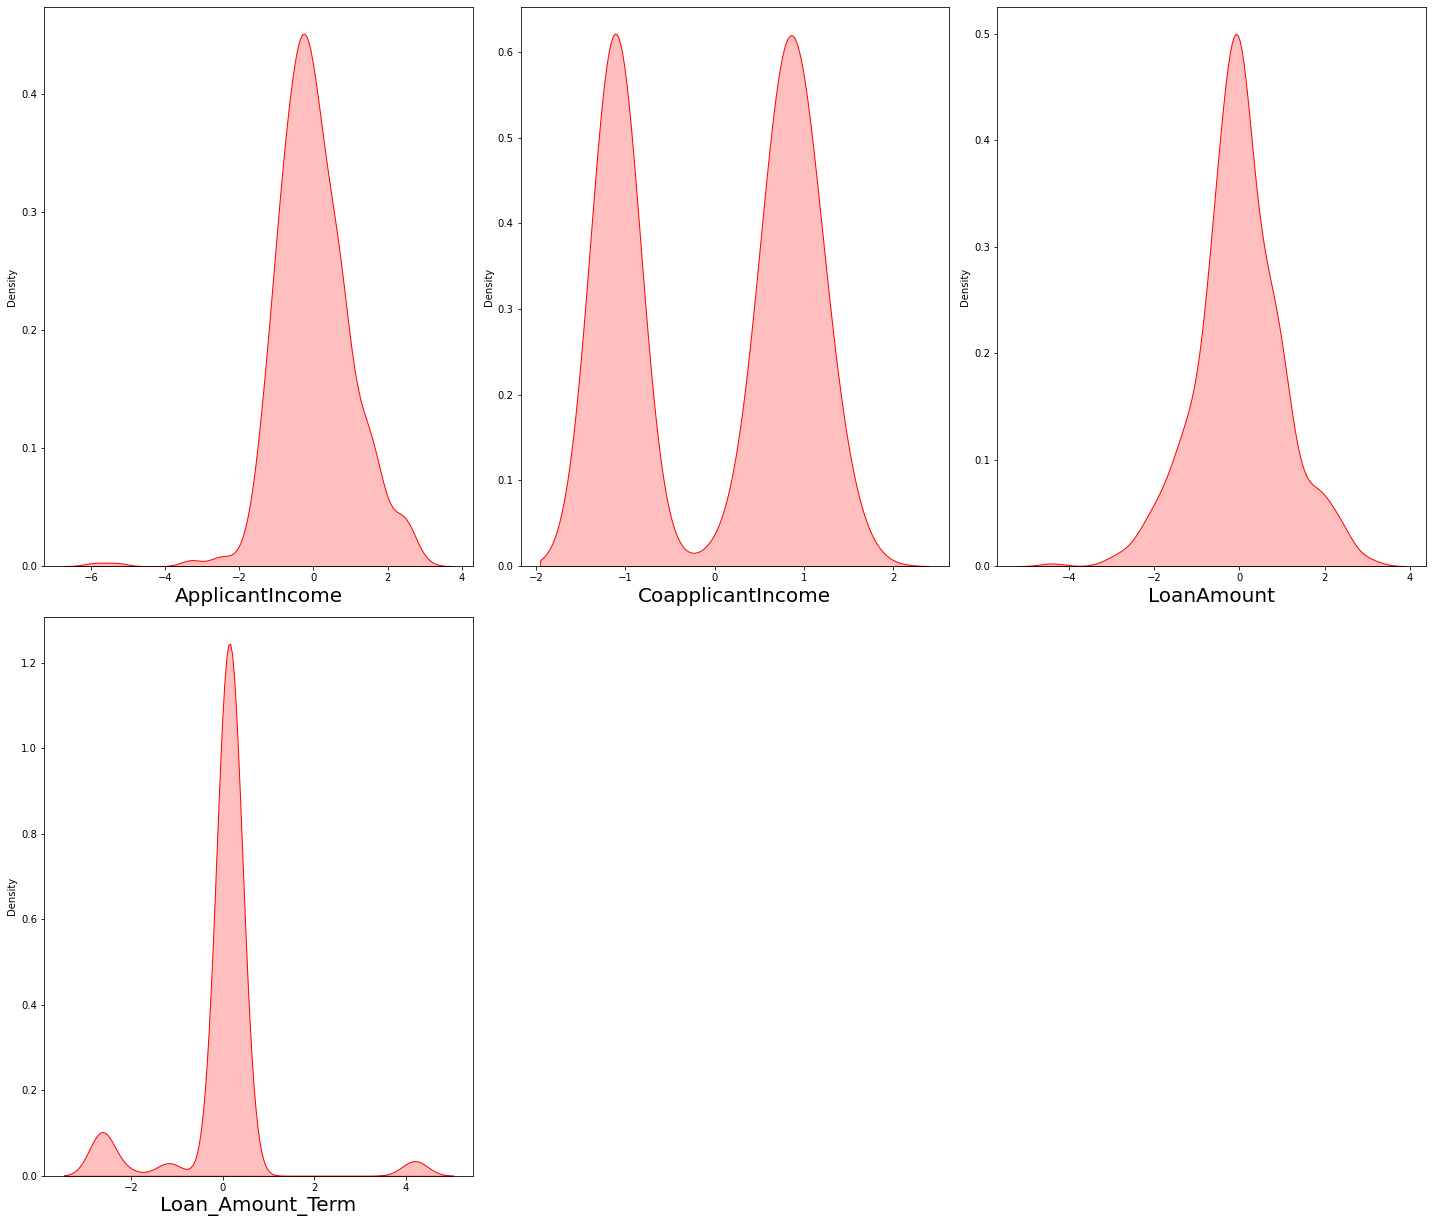

In [348]:
#after removing the skewness let us check the data distribution in each column
#Checking how data has beed distributed in each numeric column

plt.figure(figsize=(20,25), facecolor= 'white')
plotnumber=1

for column in df_new[skew]:
    if plotnumber <=9:
        ax= plt.subplot(3,3, plotnumber)
        sns.distplot(df_new[column], color='red', kde_kws={"shade":True}, hist=False)
        plt.xlabel(column, fontsize=20)
        
        
    plotnumber +=1
plt.tight_layout()

The data is almost normal also we have removed the skewness that we can notice in the above plot

In [330]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


# Encoding the Categorical columns using Label Encoding

In [349]:
categorical_col = ["Gender","Married", "Dependents","Education", "Self_Employed", "Property_Area", "Loan_Status"]

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_new[categorical_col] = df_new[categorical_col].apply(LE.fit_transform)

df_new[categorical_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


Hence, the categorical columns have been converted into numeric column using label encoder

# Correlation between the target variables  and independent variables using Heat Map

In [350]:
corr=df_new.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.060636,0.233491,0.172828,-0.099583,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.026650,0.330783,0.182897,-0.129032,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.107059,-0.000019,0.131195,-0.080286,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.174333,0.043141,-0.126560,-0.065614,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.205735,-0.084446,0.116611,-0.050690,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.060636,-0.026650,0.107059,-0.174333,0.205735,1.000000,-0.355630,0.424387,-0.089076,0.027369,-0.011176,-0.001801
CoapplicantIncome,0.233491,0.330783,-0.000019,0.043141,-0.084446,-0.355630,1.000000,0.212804,-0.004744,0.004703,-0.077148,0.076618
LoanAmount,0.172828,0.182897,0.131195,-0.126560,0.116611,0.424387,0.212804,1.000000,0.025576,-0.004831,-0.099574,-0.023034
Loan_Amount_Term,-0.099583,-0.129032,-0.080286,-0.065614,-0.050690,-0.089076,-0.004744,0.025576,1.000000,0.002694,-0.032748,-0.053090
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.027369,0.004703,-0.004831,0.002694,1.000000,-0.008121,0.560936


This gives the correlation between the dependent and independent varible. We can visualize this by plotting heatmap

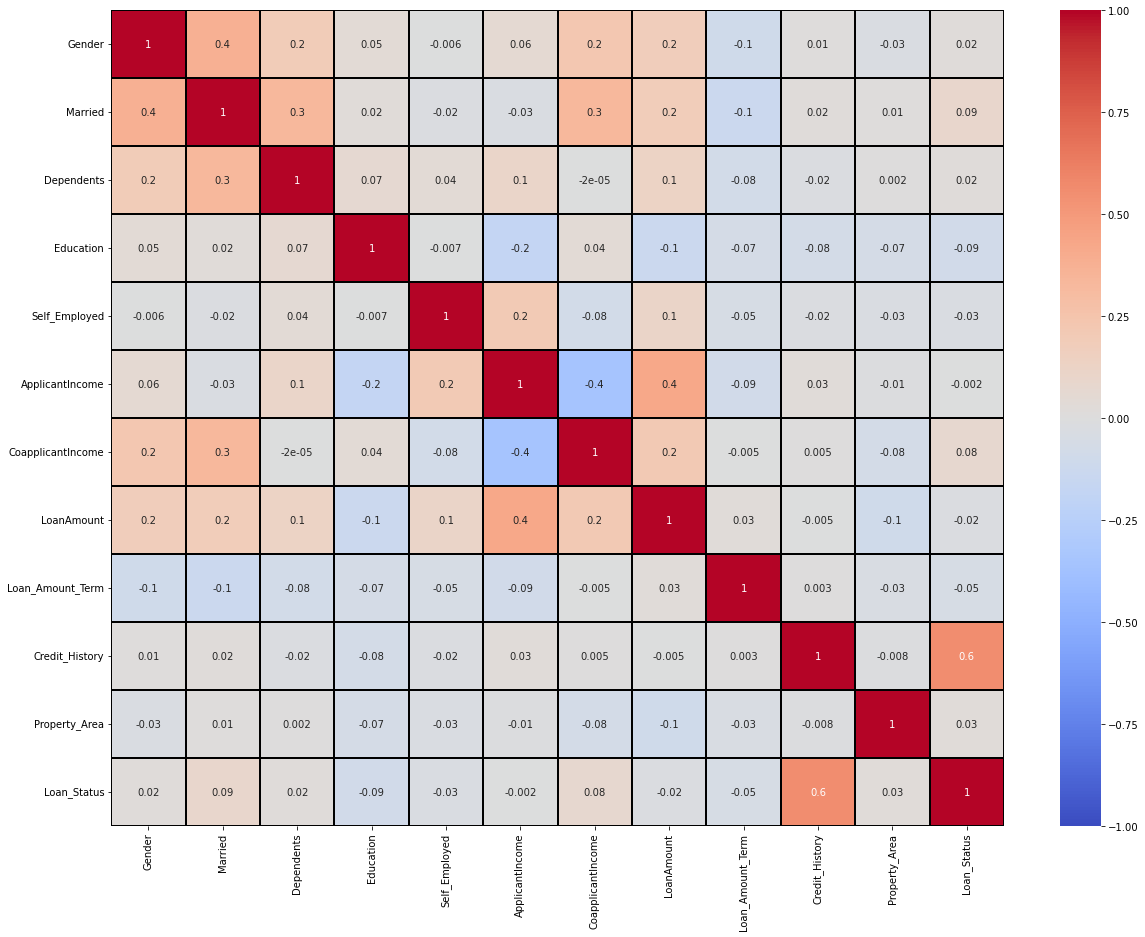

In [351]:
#Visualizing the correlation using heat map

plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(), linewidths=.1,vmin=-1,vmax=1,fmt='.1g',annot=True,linecolor="black", annot_kws={'size':10}, cmap="coolwarm")
plt.yticks(rotation=0);

There is no multicolinearity issue.

credit history is highly correlated with target column

Other features has less correlation with target column

Dark shades are highly correlated and light shades are less correlated



In [352]:
corr["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
Married              0.089026
CoapplicantIncome    0.076618
Property_Area        0.026507
Dependents           0.017872
Gender               0.017408
ApplicantIncome     -0.001801
LoanAmount          -0.023034
Self_Employed       -0.026525
Loan_Amount_Term    -0.053090
Education           -0.092658
Name: Loan_Status, dtype: float64

# Visualizing the correlation between label and features using bar plot

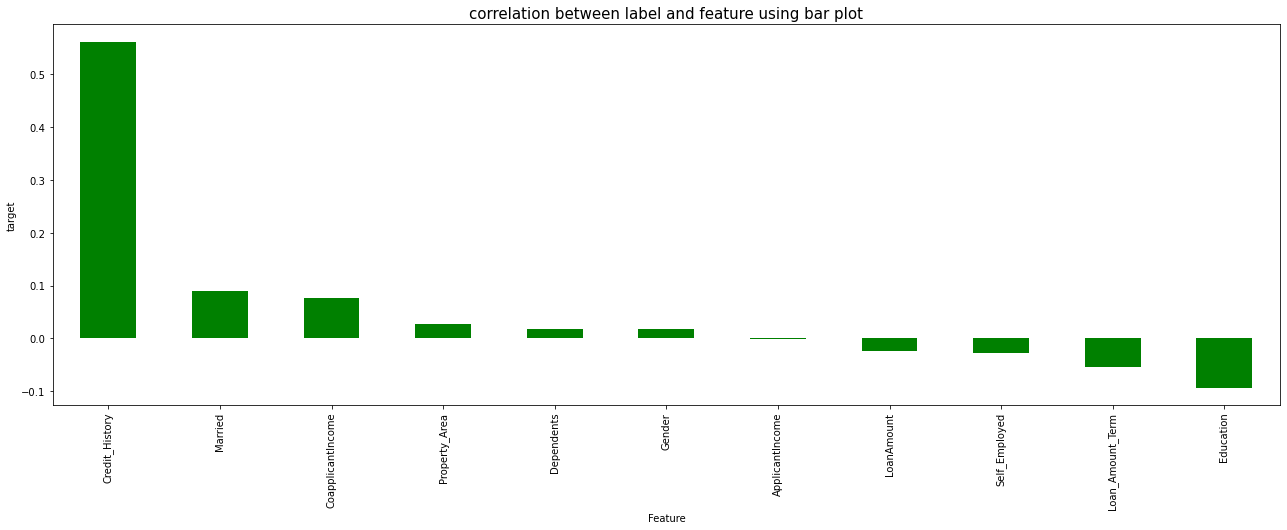

In [353]:
plt.figure(figsize=(22,7))
df_new.corr()['Loan_Status'].sort_values(ascending=False).drop('Loan_Status').plot(kind='bar', color='g')
plt.xlabel('Feature', fontsize=10)
plt.ylabel('target', fontsize=10)
plt.title('correlation between label and feature using bar plot', fontsize=15)
plt.show()

The column ApplicantIncome has very less corelation qith label so we can drop it

# Seperating the features  and label variables into x and y

In [354]:
x=df_new.drop("Loan_Status", axis=1)
y=df_new["Loan_Status"]

In [355]:
x.shape

(577, 11)

In [356]:
y.shape

(577,)

# Scaling the data using Standard Scaler

In [357]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.693376,-1.114172,0.013122,0.142297,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.258101,0.694668,0.013122,0.142297,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.511665,-1.114172,-1.452223,0.142297,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.786776,0.891216,-0.141640,0.142297,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.738669,-1.114172,0.249719,0.142297,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.573900,-1.114172,-1.304099,0.142297,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.060349,-1.114172,-2.382674,-2.640702,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.264438,0.021145,1.817498,0.142297,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.153813,-1.114172,0.975381,0.142297,0.418513,1.227472


In [358]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

We can notice class imbalance issues so let us use SMOTE method to balance it

# Balancing the target variable using Oversampling:

In [359]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x, y = SM.fit_resample(x,y)

In [360]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

Hence the data is balanced now

In [361]:
#dataframe after precessing and data cleaning

df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.693376,-1.114172,0.013122,0.142297,0.418513,2,1
1,1,1,1,0,0,0.258101,0.694668,0.013122,0.142297,0.418513,0,0
2,1,1,0,0,1,-0.511665,-1.114172,-1.452223,0.142297,0.418513,2,1
3,1,1,0,1,0,-0.786776,0.891216,-0.141640,0.142297,0.418513,2,1
4,1,0,0,0,0,0.738669,-1.114172,0.249719,0.142297,0.418513,2,1


# Finding the best Random State and accuracy

In [344]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is", maxAccu, "on Random_state", maxRs)

Best Accuracy is 0.891213389121339 on Random_state 13


In [362]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=maxRs)

In [363]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,r2_score,roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_validate,GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [364]:
# Decision Tree Classifier

In [365]:
#checking accuracy for decision tree classifier

DTC=DecisionTreeClassifier()
DTC.fit(x_train, y_train)

predDTC= DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test, predDTC))

0.7322175732217573
[[91 26]
 [38 84]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       117
           1       0.76      0.69      0.72       122

    accuracy                           0.73       239
   macro avg       0.73      0.73      0.73       239
weighted avg       0.74      0.73      0.73       239



DTC accuracy is 73%

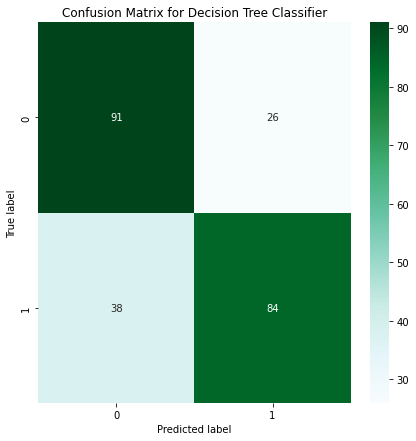

In [366]:
#lets plot confusion matrix for DTC

cm= confusion_matrix(y_test, predDTC)

x_axis_labels =["0","1"]
y_axis_labels =["0","1"]

f, ax =plt.subplots(figsize=(7,7))

sns.heatmap(cm, annot=True, fmt='.0f', ax=ax, cmap="BuGn", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Random Forest Classifer

In [367]:
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)

predRFC= RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8577405857740585
[[ 98  19]
 [ 15 107]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       117
           1       0.85      0.88      0.86       122

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.86      0.86      0.86       239



RFC accuracy is 85%

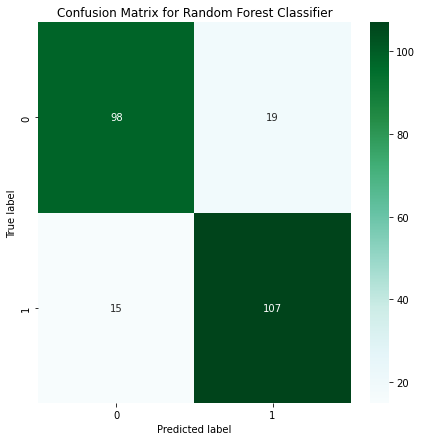

In [368]:
#lets plot confusion matrix for RFC

cm= confusion_matrix(y_test, predRFC)

x_axis_labels =["0","1"]
y_axis_labels =["0","1"]

f, ax =plt.subplots(figsize=(7,7))

sns.heatmap(cm, annot=True, fmt='.0f', ax=ax, cmap="BuGn", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Logistic Regression Classifier

In [375]:
LR=RandomForestClassifier()
LR.fit(x_train, y_train)

predLR= LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.8368200836820083
[[ 97  20]
 [ 19 103]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       117
           1       0.84      0.84      0.84       122

    accuracy                           0.84       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.84      0.84      0.84       239



LR accuracy is 83%

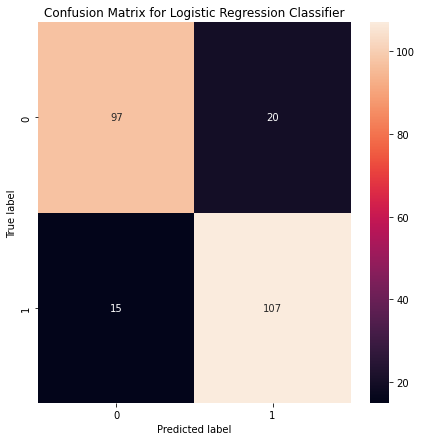

In [370]:
#lets plot confusion matrix for LR

cm= confusion_matrix(y_test, predLR)

x_axis_labels =["0","1"]
y_axis_labels =["0","1"]

f, ax =plt.subplots(figsize=(7,7))

sns.heatmap(cm, annot=True, fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# KNeighbors Classifier

In [376]:
#checking accuracy for KNeighbors classifier

knn=KNN()
knn.fit(x_train, y_train)

predknn= knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.7238493723849372
[[86 31]
 [35 87]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       117
           1       0.74      0.71      0.72       122

    accuracy                           0.72       239
   macro avg       0.72      0.72      0.72       239
weighted avg       0.72      0.72      0.72       239



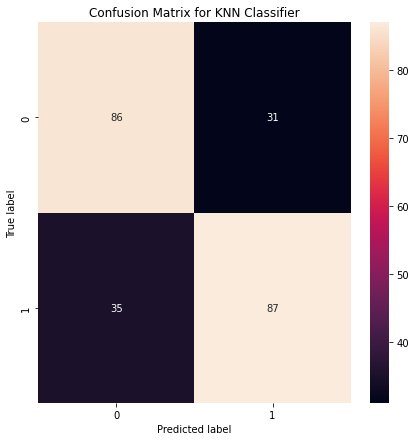

In [377]:
#lets plot confusion matrix for KNN

cm= confusion_matrix(y_test, predknn)

x_axis_labels =["0","1"]
y_axis_labels =["0","1"]

f, ax =plt.subplots(figsize=(7,7))

sns.heatmap(cm, annot=True, fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Gradient Boosting Classifier

In [378]:
#checking accuracy for Gradient Boosting classifier

GB=GradientBoostingClassifier()
GB.fit(x_train, y_train)

predGB= GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.7866108786610879
[[ 82  35]
 [ 16 106]]
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       117
           1       0.75      0.87      0.81       122

    accuracy                           0.79       239
   macro avg       0.79      0.78      0.78       239
weighted avg       0.79      0.79      0.78       239



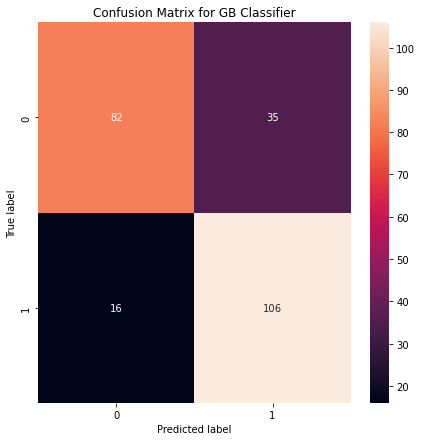

In [379]:
#lets plot confusion matrix for GB

cm= confusion_matrix(y_test, predGB)

x_axis_labels =["0","1"]
y_axis_labels =["0","1"]

f, ax =plt.subplots(figsize=(7,7))

sns.heatmap(cm, annot=True, fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for GB Classifier')
plt.show()

# Checking the Cross Validation Score


In [380]:
#cv score for DTC

print(cross_val_score(DTC, x,y, cv=5).mean())

0.7827751572327044


In [381]:
#cv score for RFC

print(cross_val_score(RFC, x,y, cv=5).mean())

0.8556053459119497


In [382]:
#cv score for LR

print(cross_val_score(LR, x,y, cv=5).mean())

0.8530817610062893


In [383]:
#cv score for KNN

print(cross_val_score(knn, x,y, cv=5).mean())

0.7538050314465409


In [384]:
#cv score for GB

print(cross_val_score(GB, x,y, cv=5).mean())

0.8003852201257862


from the differance between accuracy_score and CV score we can conclude that Random Forest Classifier is our best fitting model

# Hyper Parameter Tuning

In [385]:
from sklearn.model_selection import GridSearchCV

In [386]:
parameters={'criterion':['gini','entropy'],
           'max_features':['auto','sqrt'],
           'n_estimators':[100,200],
           'max_depth':[10,20]},

In [387]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [389]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=({'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 20],
                          'max_features': ['auto', 'sqrt'],
                          'n_estimators': [100, 200]},))

In [390]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 200}

In [391]:
Final_model=RandomForestClassifier (criterion='entropy', max_depth=20, max_features='auto', n_estimators=200)
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

85.77405857740585


The accuracy of the best model is 85.779%

# ROC AUC Curve:

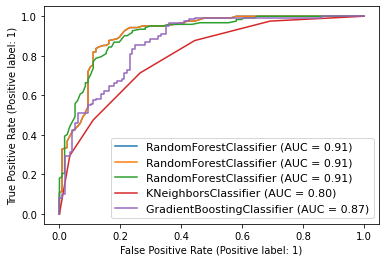

In [392]:
#plotting for all the models used here

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(RFC, x_test, y_test)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Saving the Model

In [393]:
import joblib
joblib.dump(Final_model, "Loan_Application_Prediction.pkl")

['Loan_Application_Prediction.pkl']

# Predicting the Saved model

In [394]:
model=joblib.load("Loan_Application_Prediction.pkl")

prediction=model.predict(x_test)
prediction

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [395]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"]).T


,Predicted,Original
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
234,1,1
235,1,1
236,1,1
237,0,0


The predicted and actual values are almost the same

# Thank you